<a href="https://www.kaggle.com/code/rasikagurav/fake-or-real-news-analysis?scriptVersionId=248102755" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiisA
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
##import kagglehub
##clmentbisaillon_fake_and_real_news_dataset_path = kagglehub.dataset_download('clmentbisaillon/fake-and-real-news-dataset')

#print('Data source import complete.')


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fake-and-real-news-dataset/True.csv
/kaggle/input/fake-and-real-news-dataset/Fake.csv


In [3]:
fake=pd.read_csv('/kaggle/input/fake-and-real-news-dataset/Fake.csv')
true=pd.read_csv('/kaggle/input/fake-and-real-news-dataset/True.csv')

In [4]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
fake['Label']=0
true['Label']=1

In [6]:
display(fake.head())
display(true.head())

,title,text,subject,date,Label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


,title,text,subject,date,Label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [7]:
display(fake.info())
display(true.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
 4   Label    23481 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 917.4+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
 4   Label    21417 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 836.7+ KB


None

In [8]:
fake.isnull().sum()

title      0
text       0
subject    0
date       0
Label      0
dtype: int64

In [9]:
true.isnull().sum()

title      0
text       0
subject    0
date       0
Label      0
dtype: int64

In [10]:
fake.duplicated().sum()

3

In [11]:
true.duplicated().sum()

206

In [12]:
fake.drop_duplicates(inplace=True)
true.drop_duplicates(inplace=True)

In [13]:
fake.head()

,title,text,subject,date,Label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [14]:
#fake=fake.drop(['text','subject','date'],axis=1)
#true=true.drop(['text','subject','date'],axis=1)

In [15]:
df=pd.concat([fake,true],ignore_index=True)

In [16]:
df

,title,text,subject,date,Label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
44684,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
44685,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
44686,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
44687,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


In [17]:
df=df.drop(['date'],axis=1)

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt


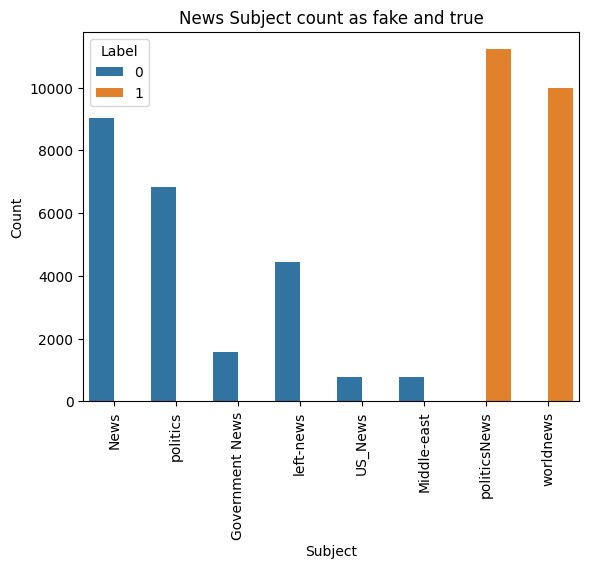

In [19]:
sns.countplot(x='subject',hue='Label',data=df)
plt.title('News Subject count as fake and true')
plt.xlabel('Subject')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [20]:
df=df.drop(['title','subject'],axis=1)

In [21]:
import re
import nltk
#from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('punkt_tab')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /usr/share/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [22]:
#nltk.download('wordnet', "/kaggle/working/nltk_data/")
#nltk.download('omw-1.4', "/kaggle/working/nltk_data/")
#! unzip /kaggle/working/nltk_data/corpora/wordnet.zip -d /kaggle/working/nltk_data/corpora
#! unzip /kaggle/working/nltk_data/corpora/omw-1.4.zip -d /kaggle/working/nltk_data/corpora
#nltk.data.path.append("/kaggle/working/nltk_data/")


In [23]:
def clean_df(text):
    text=re.sub(r'\s+',' ',text,flags=re.I)
    text=re.sub(r'\W',' ',str(text))
    text=re.sub(r'\s+[a-zA-Z]\s+',' ',text)
    text=re.sub(r'[^a-zA-Z\s]','',text)
    text=text.lower()
    words=word_tokenize(text)
    lemmatize=WordNetLemmatizer()
    words=[lemmatize.lemmatize(word) for word in words]
    stop_words=set(stopwords.words('english'))
    words=[word for word in words if word not in stop_words]
    words=[word for word in words if len(word)>4]
    indices=np.unique(words,return_index=True)[1]
    clean_text=np.array(words)[np.sort(indices)].tolist()


    return clean_text




In [24]:
X=df.drop(['Label'],axis=1)
y=df['Label']

In [25]:
texts=list(X['text'])

In [26]:
X_clean=[clean_df(text) for text in texts]

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_train,x_test,y_train,y_test=train_test_split(X_clean,y,test_size=0.2,random_state=0)

In [29]:
#x_train

In [30]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

2025-06-30 10:06:32.844703: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751277993.029292      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751277993.083133      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [31]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts(x_train)
word_idx=tokenizer.word_index
size_vocab=len(word_idx)

In [32]:
size_vocab

87075

In [33]:
x_train=tokenizer.texts_to_sequences(x_train)
x_test=tokenizer.texts_to_sequences(x_test)

In [34]:
max_len=150
x_train=pad_sequences(x_train,maxlen=max_len)
x_test=pad_sequences(x_test,maxlen=max_len)

In [35]:
from keras.models import Sequential
from keras.layers import Embedding,LSTM,Dense,Input,GlobalMaxPooling1D,Dropout

In [36]:
from tensorflow.keras.models import Model
from keras import optimizers
from tensorflow.keras.optimizers import Adam

In [37]:
input=Input(shape=(max_len,))
#learning_rate=0.0001
x=Embedding(size_vocab+1,100)(input)
x=Dropout(0.5)(x)
x=LSTM(150,return_sequences=True)(x)
x=Dropout(0.5)(x)
x=GlobalMaxPooling1D()(x)
x=Dense(64,activation='relu')(x)
x=Dropout(0.5)(x)
x=Dense(2,activation='softmax')(x)


model=Model(input,x)


optimizer=Adam(learning_rate=0.0001)

model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])



I0000 00:00:1751278010.092428      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1751278010.093069      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


In [38]:
from sklearn.preprocessing import LabelEncoder
lr=LabelEncoder()
y_train_lr=lr.fit_transform(y_train)
y_test_lr=lr.transform(y_test)

In [39]:
y_train_lr

array([0, 0, 0, ..., 1, 1, 0])

In [40]:
import tensorflow as tf

y_train_oh=tf.keras.utils.to_categorical(y_train_lr)
y_test_oh=tf.keras.utils.to_categorical(y_test_lr)

In [41]:
#x_train

In [42]:
y_train_oh

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [1., 0.]])

In [43]:
history=model.fit(x_train,y_train_oh,epochs=15,validation_data=(x_test,y_test_oh))

Epoch 1/15


I0000 00:00:1751278016.139805      61 cuda_dnn.cc:529] Loaded cuDNN version 90300


1118/1118 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - accuracy: 0.7109 - loss: 0.4910 - val_accuracy: 0.9803 - val_loss: 0.1031
Epoch 2/15
1118/1118 ━━━━━━━━━━━━━━━━━━━━ 16s 14ms/step - accuracy: 0.9812 - loss: 0.0567 - val_accuracy: 0.9869 - val_loss: 0.0581
Epoch 3/15
1118/1118 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step - accuracy: 0.9913 - loss: 0.0285 - val_accuracy: 0.9888 - val_loss: 0.0413
Epoch 4/15
1118/1118 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step - accuracy: 0.9965 - loss: 0.0155 - val_accuracy: 0.9896 - val_loss: 0.0325
Epoch 5/15
1118/1118 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step - accuracy: 0.9983 - loss: 0.0078 - val_accuracy: 0.9928 - val_loss: 0.0382
Epoch 6/15
1118/1118 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step - accuracy: 0.9984 - loss: 0.0072 - val_accuracy: 0.9918 - val_loss: 0.0330
Epoch 7/15
1118/1118 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step - accuracy: 0.9991 - loss: 0.0048 - val_accuracy: 0.9913 - val_loss: 0.0297
Epoch 8/15
1118/1118 ━━━━━━━━━━━━━━━━━━━━ 17s 15ms/step - accuracy: 0.9994 - loss: 0.00

In [44]:
loss,accuracy=model.evaluate(x_test,y_test_oh)

280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9908 - loss: 0.0342


In [45]:
print('test loss:',loss)
print('test accuracy',accuracy)

test loss: 0.03366102650761604
test accuracy 0.9910494685173035
